<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos las librerías

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import pandas as pd

Generamos un conjunto de datos que no es lineal.

¿Se puede fitear una linea recta a nuestro conjunto de datos? 

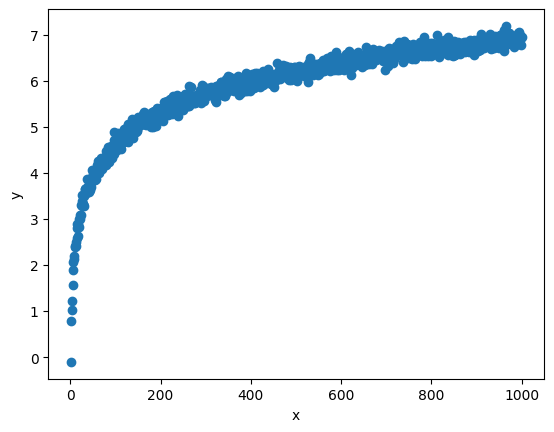

In [28]:
df=pd.DataFrame()

M=1000
a=1
b=20
df['X'] = pd.Series(range(1, M+1))
df['y']=(np.log(range(1,M+1))+0.1*stats.norm.rvs(0,1,M))

plt.scatter(df['X'],df['y'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Probemos...

In [4]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(df['X'].values.reshape(-1,1), df['y'])

LinearRegression()

Y listo, tenemos nuestra recta ajustada

In [16]:
Y_est=lr.predict(df['X'].values.reshape(-1,1))

El ajuste es bastante malo... R^2=0.75

In [15]:
lr.score(df['X'].values.reshape(-1,1), df['y'])

0.7529976075014012

Gráficamente

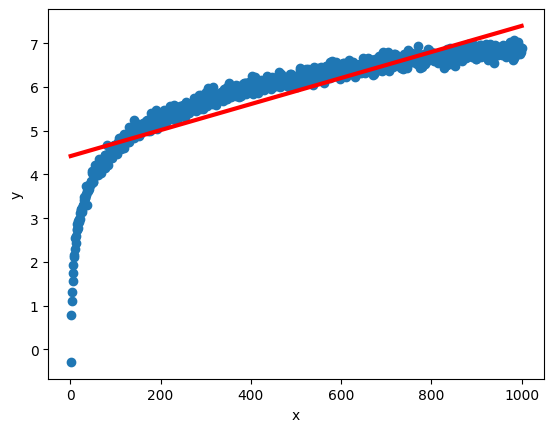

In [19]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'], Y_est, color='red', linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Pero podríamos generar una variable nueva que sea una transformación de nuestra variable original

In [21]:
df['L.X']=np.log(df['X'])

Ajustamos nuevamente nuestra regresión lineal

In [22]:
lr.fit(df['L.X'].values.reshape(-1,1), df['y'])

LinearRegression()

In [23]:
Y_est=lr.predict(df['L.X'].values.reshape(-1,1))

Y listo! El ajuste es casi perfecto

In [24]:
lr.score(df['L.X'].values.reshape(-1,1), df['y'])

0.9900619896185466

Gráficamente: 

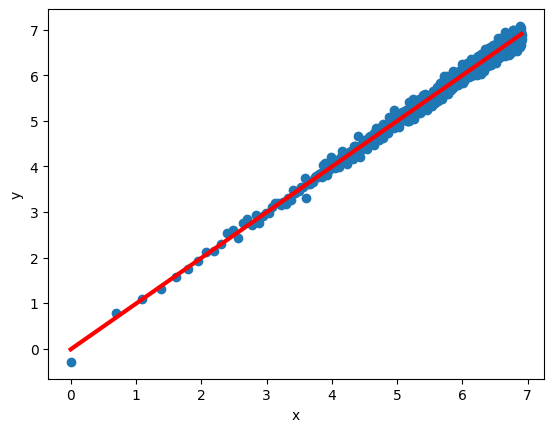

In [26]:
plt.scatter(df['L.X'],df['y'])
plt.plot(df['L.X'], Y_est, color='red', linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()